# EDA + Missing Values + Outlier + ML

### Dataset Description

* **This dataset comes from the UCI repository of machine learning databases. The task is to predict if an individual's annual income excceds 50,000 based on census data.**
* **Attribute Information:**
1. **age: continuous.**
2. **workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.**
3. **fnlwgt: continuous.**
4. **education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.**
5. **education-num: continuous.**
6. **marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.**
7. **occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.**
8. **relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.**
9. **race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.**
10. **sex: Female, Male**
11. **capital-gain: continuous.**
12. **capital-loss: continuous.**
13. **hours-per-week: continuous.**
14. **native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.**
15. **class: >50K, <=50K**

### Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

### Importing the data

In [3]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape #(number of rows , number of columns)

(48842, 15)

In [5]:
df.columns #All columns name

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
# Number of numeric columns
numerics = ['int64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

6

In [8]:
# Numerical Columns
numerical_data = df.select_dtypes(['int64'])
numerical_cols = numerical_data.columns
print('Numerical Columns : {}'.format(list(numerical_cols)))

Numerical Columns : ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [9]:
# Categorical Columns
categorical_data = df.select_dtypes(['object'])
categorical_cols = categorical_data.columns
print('Categotical Columns : {}'.format(list(categorical_cols)))

Categotical Columns : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [10]:
# Quick statistical Analysis of the Dataset
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
# Checking for null values
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Exploratory Data Analysis and Visualization

In [12]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

## Univariate Analysis

In [13]:
#Creating a function to save time
def plot(clm):
    sns.set_style("darkgrid")
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    sns.distplot(df[clm])
    plt.axvline(df[clm].mean(), color="brown", label="Mean")
    plt.legend(shadow=True,fontsize="larger")
    plt.subplot(1, 2, 2)
    sns.histplot(df[clm])
    plt.axvline(df[clm].mean(), color="black", label="Mean")
    plt.legend(shadow=True,fontsize="larger")

    skew = df[clm].skew()
    kurt = df[clm].kurt()
    print('Skewness:{}'.format(round(skew,2)))
    print('Kurtosis:{}'.format(round(kurt,2)))

### Distribution of age

Skewness:0.56
Kurtosis:-0.18


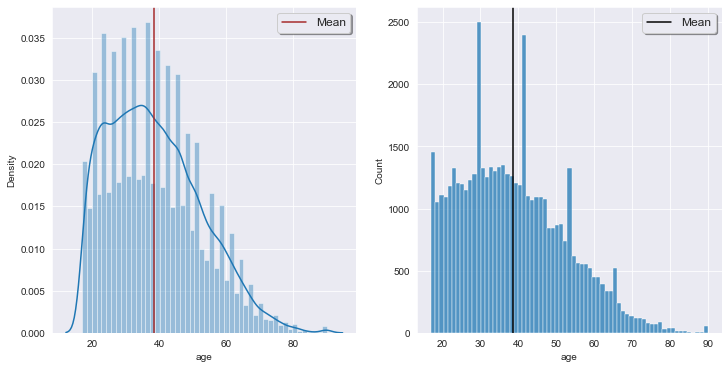

In [14]:
plot('age')

**From the above plots as we can say that it's having a thick tail towards the right side and looks like a positively skewed distribution**

### Distribution of fnlwgt

Skewness:1.44
Kurtosis:6.06


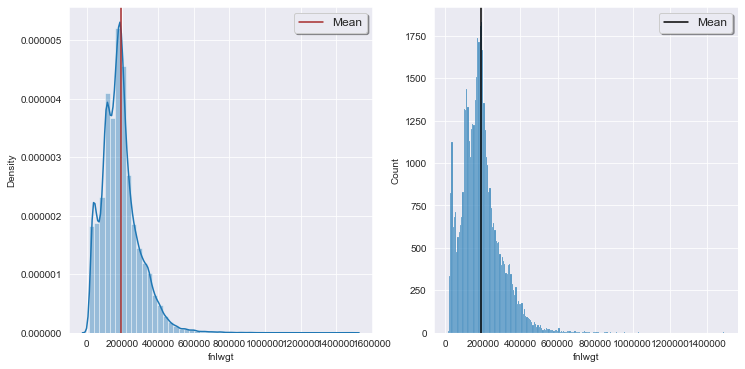

In [15]:
 plot('fnlwgt')

**From the above plots as we can say that it's having a long tail towards the right side and looks like a log normal distribution**

### Distribution of educational-num

Skewness:-0.32
Kurtosis:0.63


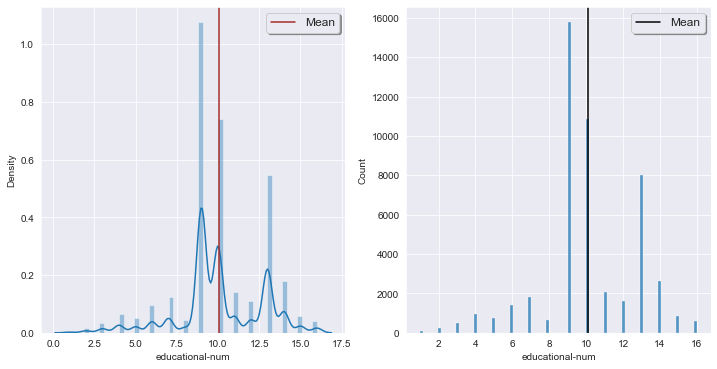

In [16]:
 plot('educational-num')

### Distribution of capital-gain

Skewness:11.89
Kurtosis:152.69


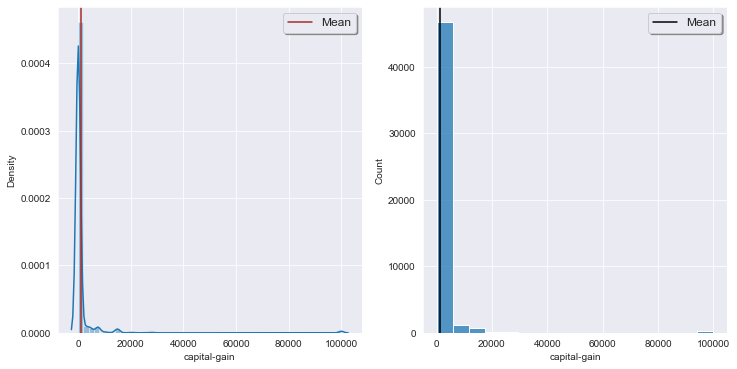

In [17]:
 plot('capital-gain')

**From the above plots as we can say that it's having a long tail towards the right side and looks like a Pareto distribution**

### Distribution of capital-loss

Skewness:4.57
Kurtosis:20.01


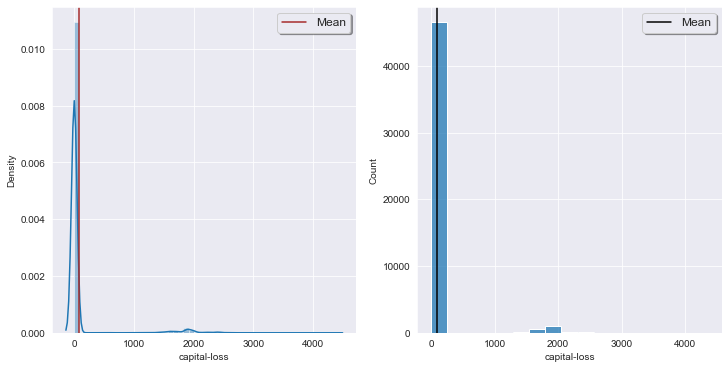

In [18]:
 plot('capital-loss')

**From the above plots as we can say that it's having a long tail towards the right side and looks like a Pareto distribution**

### Distribution of hours-per-week

Skewness:0.24
Kurtosis:2.95


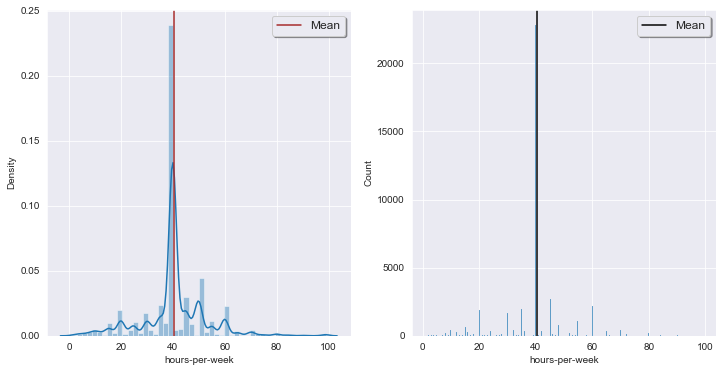

In [19]:
 plot('hours-per-week')

### Ploting the workclass to find the count

In [20]:
df['workclass']

0             Private
1             Private
2           Local-gov
3             Private
4                   ?
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 48842, dtype: object

In [21]:
unique_workclass = df['workclass'].unique()
len(unique_workclass) 

9

In [22]:
workclass_count = df['workclass'].value_counts()
workclass_count

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Text(0, 0.5, 'Count')

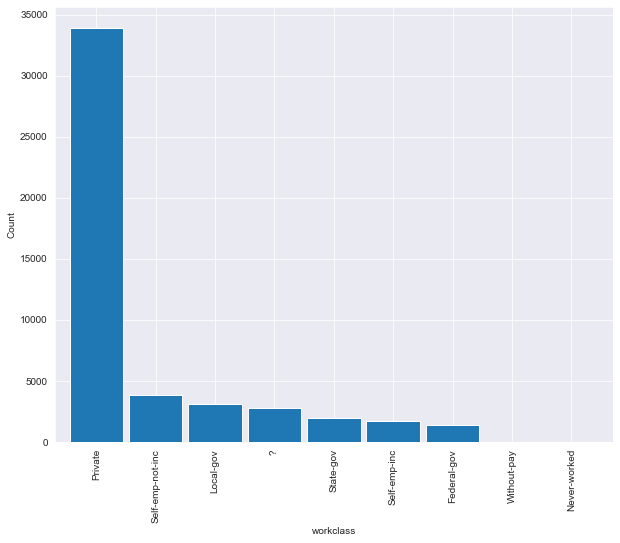

In [23]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
workclass_count.plot(kind='bar' , width=0.9)
plt.xlabel('workclass')
plt.ylabel('Count')

**From the above plot, we can say the majority of Workclass belongs to the Private Sector. Very few percent of Workclass belongs to other categories.**

### Ploting the education to find the count

In [24]:
df['education']

0                11th
1             HS-grad
2          Assoc-acdm
3        Some-college
4        Some-college
             ...     
48837      Assoc-acdm
48838         HS-grad
48839         HS-grad
48840         HS-grad
48841         HS-grad
Name: education, Length: 48842, dtype: object

In [25]:
unique_education = df['education'].unique()
len(unique_education) 

16

In [26]:
education_count = df['education'].value_counts()
education_count

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

Text(0, 0.5, 'Count')

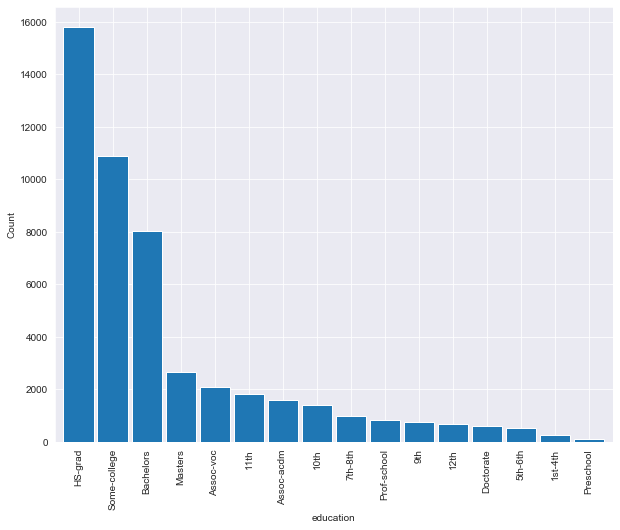

In [27]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
education_count.plot(kind='bar' , width=0.9)
plt.xlabel('education')
plt.ylabel('Count')

**From the above plot, we can say that Highest Education level of an Individual is HS-grad.**

### Ploting the marital-status to find the count

In [28]:
df['marital-status']

0             Never-married
1        Married-civ-spouse
2        Married-civ-spouse
3        Married-civ-spouse
4             Never-married
                ...        
48837    Married-civ-spouse
48838    Married-civ-spouse
48839               Widowed
48840         Never-married
48841    Married-civ-spouse
Name: marital-status, Length: 48842, dtype: object

In [29]:
unique_maritalstatus = df['marital-status'].unique()
len(unique_maritalstatus) 

7

In [30]:
maritalstatus_count = df['marital-status'].value_counts()
maritalstatus_count

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

Text(0, 0.5, 'Count')

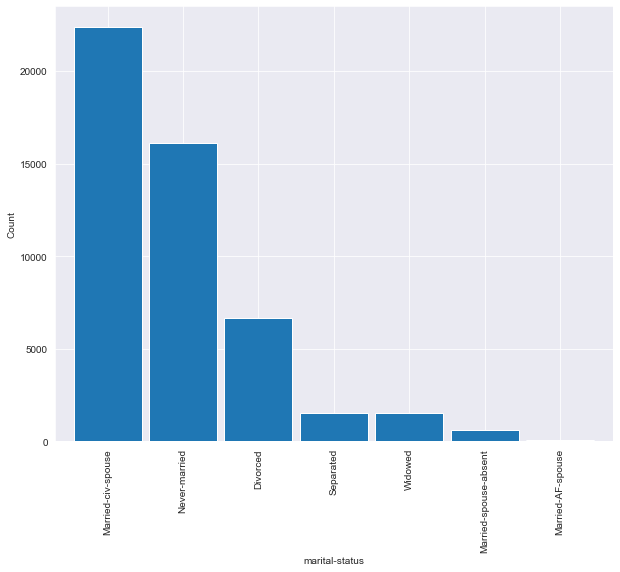

In [31]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
maritalstatus_count.plot(kind='bar' , width=0.9)
plt.xlabel('marital-status')
plt.ylabel('Count')

**From the above plot, we can say that Married-civ-spouse is the highest in the population**

### Ploting the occupation to find the count

In [32]:
df['occupation']

0        Machine-op-inspct
1          Farming-fishing
2          Protective-serv
3        Machine-op-inspct
4                        ?
               ...        
48837         Tech-support
48838    Machine-op-inspct
48839         Adm-clerical
48840         Adm-clerical
48841      Exec-managerial
Name: occupation, Length: 48842, dtype: object

In [33]:
unique_occupation = df['occupation'].unique()
len(unique_occupation) 

15

In [34]:
occupation_count = df['occupation'].value_counts()
occupation_count

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

Text(0, 0.5, 'Count')

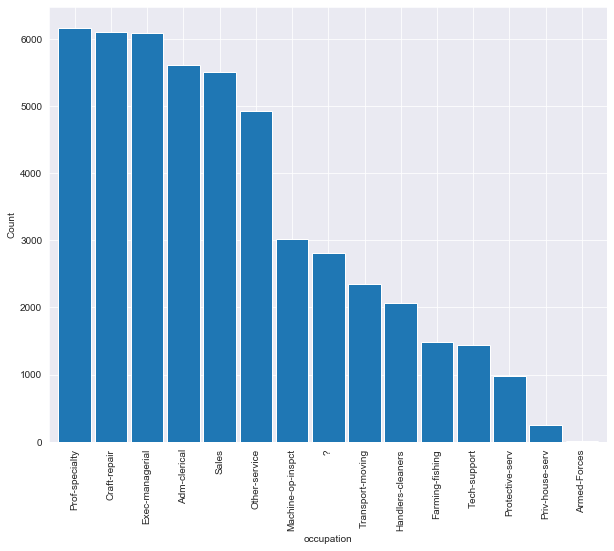

In [35]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
occupation_count.plot(kind='bar' , width=0.9)
plt.xlabel('occupation')
plt.ylabel('Count')

**From the above plot, we can say that the most of the occupation follows is Prof-specialty**

 ### Ploting the relationship to find the count

In [36]:
df['relationship']

0        Own-child
1          Husband
2          Husband
3          Husband
4        Own-child
           ...    
48837         Wife
48838      Husband
48839    Unmarried
48840    Own-child
48841         Wife
Name: relationship, Length: 48842, dtype: object

In [37]:
unique_relationship = df['relationship'].unique()
len(unique_relationship) 

6

In [38]:
relationship_count = df['relationship'].value_counts()
relationship_count

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

Text(0, 0.5, 'Count')

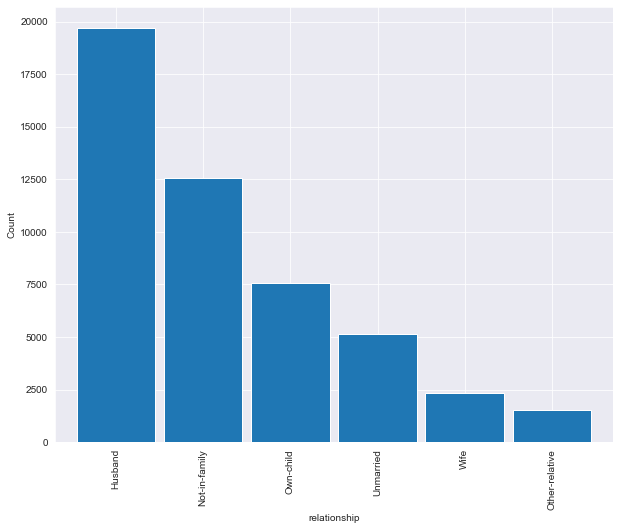

In [39]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
relationship_count.plot(kind='bar' , width=0.9)
plt.xlabel('relationship')
plt.ylabel('Count')

### Ploting the race to find the count

In [40]:
df['race']

0        Black
1        White
2        White
3        Black
4        White
         ...  
48837    White
48838    White
48839    White
48840    White
48841    White
Name: race, Length: 48842, dtype: object

In [41]:
unique_race = df['race'].unique()
len(unique_race) 

5

In [42]:
race_count = df['race'].value_counts()
race_count

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

Text(0, 0.5, 'Count')

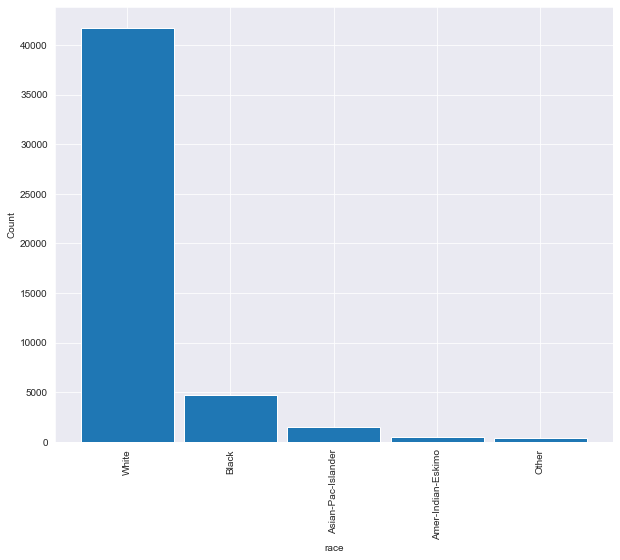

In [43]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
race_count.plot(kind='bar' , width=0.9)
plt.xlabel('race')
plt.ylabel('Count')

### Ploting the gender to find the count

In [44]:
df['gender']

0          Male
1          Male
2          Male
3          Male
4        Female
          ...  
48837    Female
48838      Male
48839    Female
48840      Male
48841    Female
Name: gender, Length: 48842, dtype: object

In [45]:
unique_gender = df['gender'].unique()
len(unique_gender) 

2

In [46]:
gender_count = df['gender'].value_counts()
gender_count

Male      32650
Female    16192
Name: gender, dtype: int64

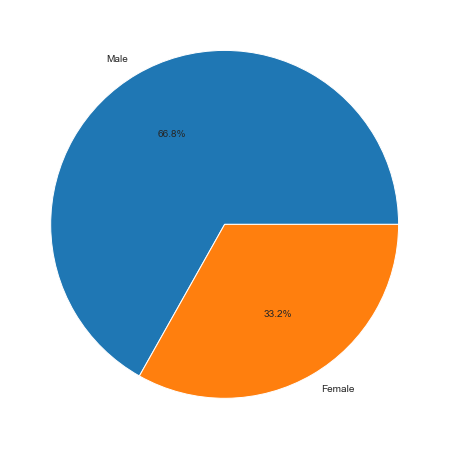

In [47]:
plt.figure(figsize=(15,8))
labels=['Male','Female']
data=df.gender.value_counts()
plt.pie(data,labels=labels,autopct="%.1f%%")
plt.show()

### Ploting the native-country to find the count

In [48]:
df['native-country']

0        United-States
1        United-States
2        United-States
3        United-States
4        United-States
             ...      
48837    United-States
48838    United-States
48839    United-States
48840    United-States
48841    United-States
Name: native-country, Length: 48842, dtype: object

In [49]:
unique_native_country = df['native-country'].unique()
len(unique_native_country) 

42

In [50]:
native_country_count = df['native-country'].value_counts()
native_country_count

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

Text(0, 0.5, 'Count')

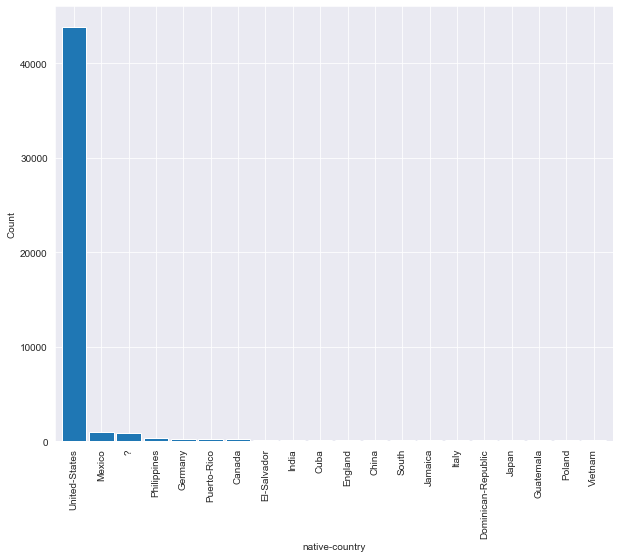

In [51]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
native_country_count[:20].plot(kind='bar' , width=0.9)
plt.xlabel('native-country')
plt.ylabel('Count')

### Ploting the income to find the count

In [52]:
df['income']

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

In [53]:
unique_income = df['income'].unique()
len(unique_income) 

2

In [54]:
income_count = df['income'].value_counts()
income_count

<=50K    37155
>50K     11687
Name: income, dtype: int64

Text(0, 0.5, 'Count')

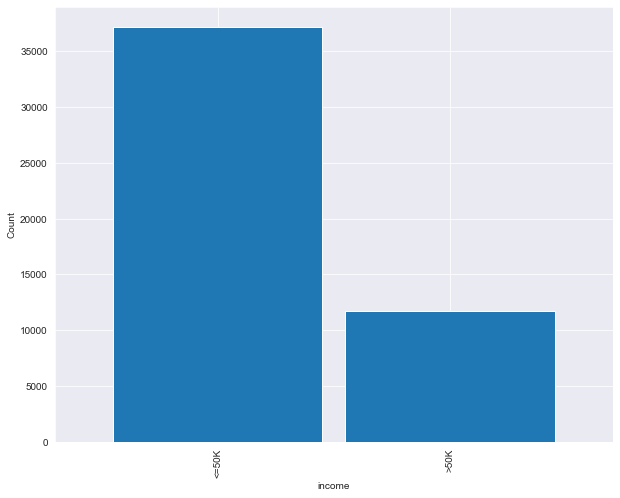

In [55]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
income_count.plot(kind='bar' , width=0.9)
plt.xlabel('income')
plt.ylabel('Count')

## Bivariate Analysis

### Workclass by Age Distribution

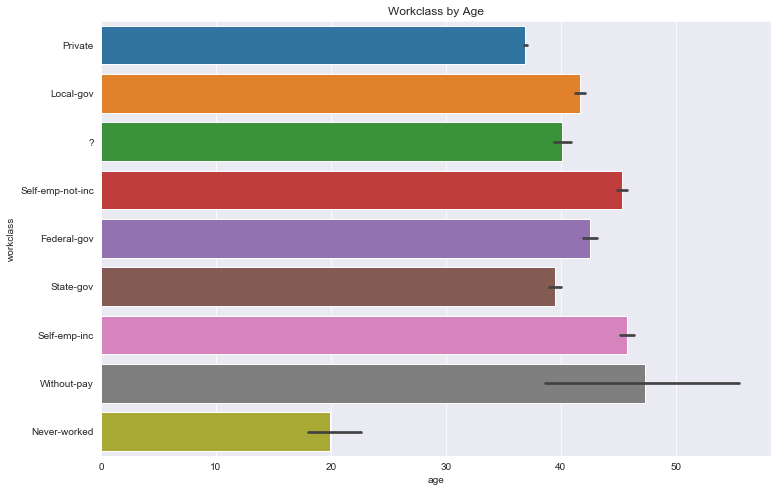

In [56]:
plt.figure(figsize=(12,8))
sns.barplot(y='workclass',x='age',data=df)
plt.title('Workclass by Age')
plt.show()

### Marital Status by Age Distribution

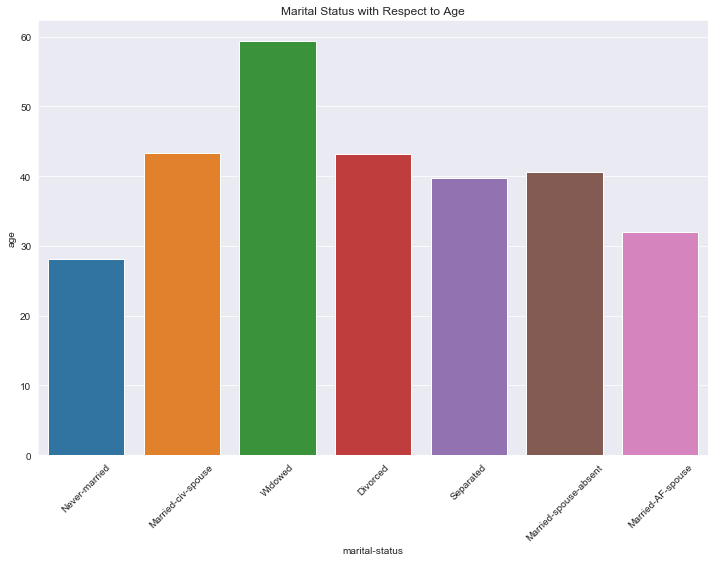

In [57]:
plt.figure(figsize=(12,8))
sns.barplot(x='marital-status',y='age',ci=None,data=df)
plt.title('Marital Status with Respect to Age')
plt.xticks(rotation=45)
plt.show()

### Income with respect to age

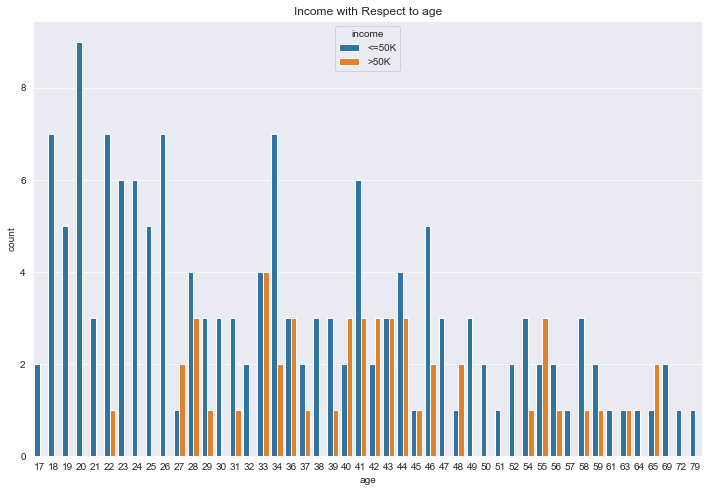

In [58]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.countplot(x=df['age'][:200],hue='income',data=df)
plt.title('Income with Respect to age')
plt.show()

### Income with respect to Relationship Status

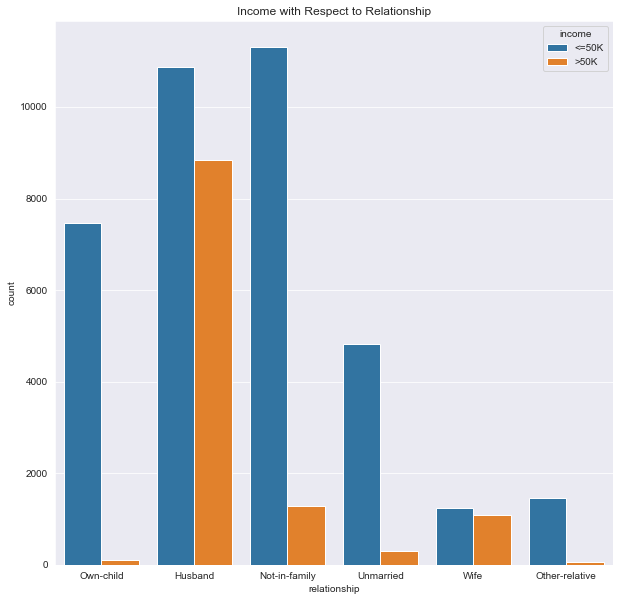

In [59]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.countplot(x='relationship',hue='income',data=df)
plt.title('Income with Respect to Relationship')
plt.show()

### Job Occupation with Respect to Income

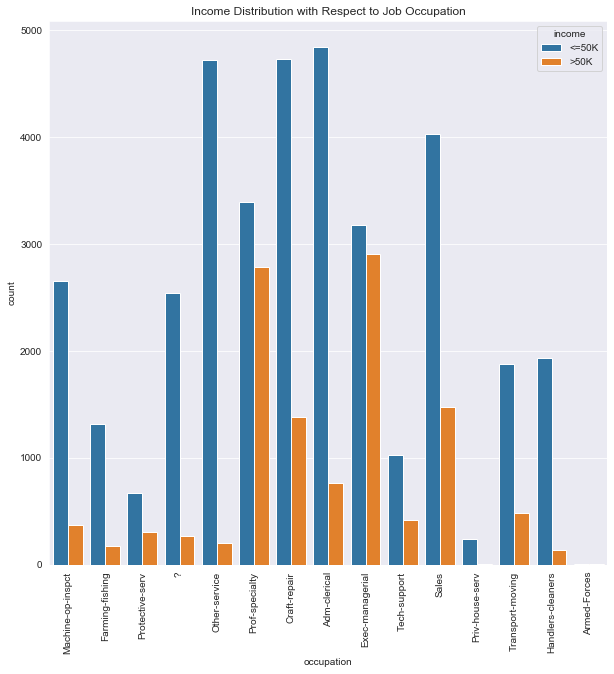

In [60]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.countplot(x='occupation',hue='income',data=df)
plt.title('Income Distribution with Respect to Job Occupation')
plt.xticks(rotation=90)
plt.show()

### Income with Respect to Education Level

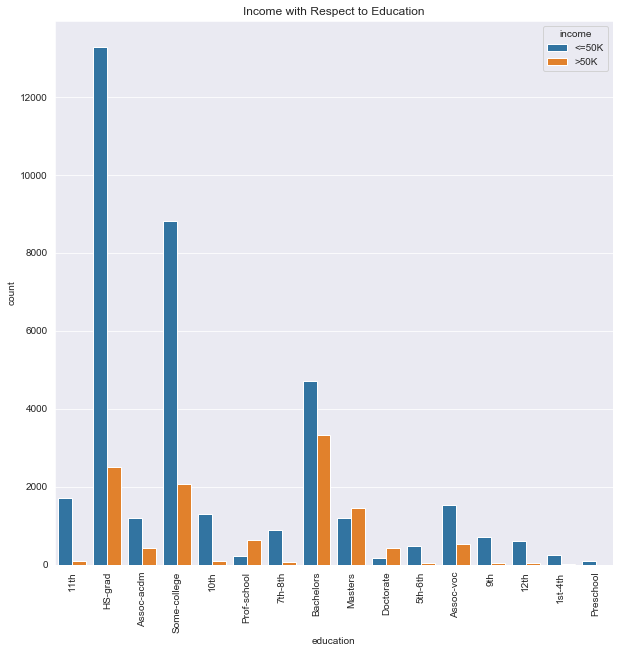

In [61]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.countplot(x='education',hue='income',data=df)
plt.title('Income with Respect to Education')
plt.xticks(rotation=90)
plt.show()

## Feature Engineering

**Handling the missing values and cleaning the data**

In [62]:
#The null values exists in the dataset as '?'. Replacing those with nan values.
columns = list(df.columns)
for col in columns:    
    df[col] = df[col].replace('?',np.nan)

In [63]:
df.isnull().any()

age                False
workclass           True
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation          True
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country      True
income             False
dtype: bool

**We can see that there are some null values in the columns**

In [64]:
# Dropping the null values
df = df.loc[df['workclass'].notnull(), :]
df = df.loc[df['occupation'].notnull(), :]
df = df.loc[df['native-country'].notnull(), :]

In [65]:
df.isnull().any() 

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

In [66]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [67]:
# We can drop some unneccessary columns to keep our dataset clean
df.drop(['fnlwgt','capital-gain','capital-loss'],axis=1,inplace=True)
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


In [68]:
#let's convert the value of the income column to get dummies
df['income'] = df['income'].replace({'<=50K': 'low', '>50K': 'high'})

In [69]:
df.loc[df['native-country'] != 'United-States', 'native-country'] = 'Other-country'

In [70]:
#Since 72% of the citizens living in USA are White American(note: the U.S. the U.S. Source sensus), we will reduce race category into two categories White and others.
df.loc[df['race'] != 'White', 'race'] = 'Other'

In [71]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Other,Male,40,United-States,low
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,low
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,high
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Other,Male,40,United-States,high
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,low


In [72]:
# Number of Outliers in each Numerical columns

numeric_data = df.select_dtypes(['int64','float64']).columns

outliers = pd.DataFrame(columns=['Feature','Number of Outliers','Percentage']) # Creating a new dataframe
    
for column in list(numeric_data): # Iterating thorough each feature 
   
    q1 = df[column].quantile(0.25)  # first quartile
    q3 = df[column].quantile(0.75)  # third quartile
            
    iqr = q3 - q1 #Inter Quantile Range
        
    lower_value = q1 - (1.5*iqr)        
    upper_value = q3 + (1.5*iqr)
        
     
    total_outlier = df[(df[column] < lower_value) | (df[column] > upper_value)].shape[0]    
    percent = (total_outlier / len(df[column])) * 100
        
    outliers = outliers.append({'Feature':column,'Number of Outliers':total_outlier,'Percentage':percent},ignore_index=True)
        
outliers

,Feature,Number of Outliers,Percentage
0,age,269,0.594843
1,educational-num,294,0.650126
2,hours-per-week,11899,26.312414


**In the 'hours-per-week' column there are more outliers that we have to treat**

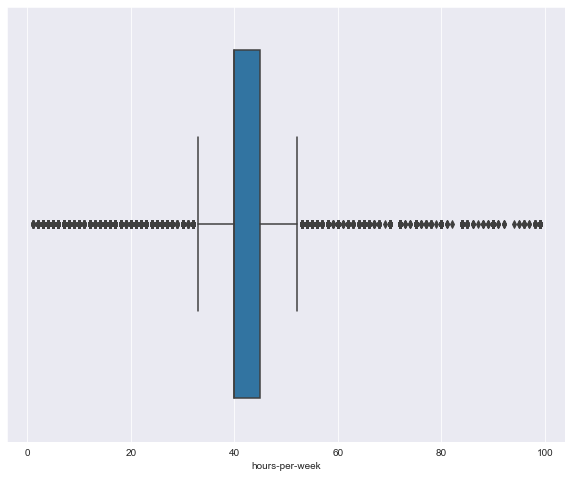

In [73]:
#boxplot of hours-per-week
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.boxplot(df['hours-per-week'])
plt.show()

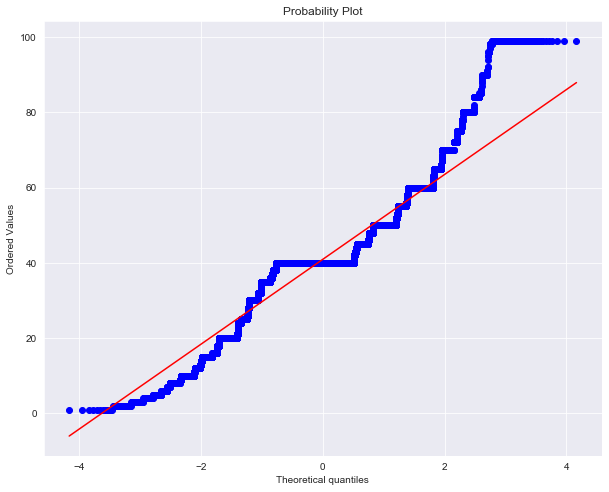

In [74]:
#let's plot a QQ plot to check the normality
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
stats.probplot(df['hours-per-week'],dist='norm', plot=plt)
plt.show()

In [75]:
# Using boxcox transformation
pr_1 , l = stats.boxcox(df['hours-per-week'])
print(l)

0.957404248835031


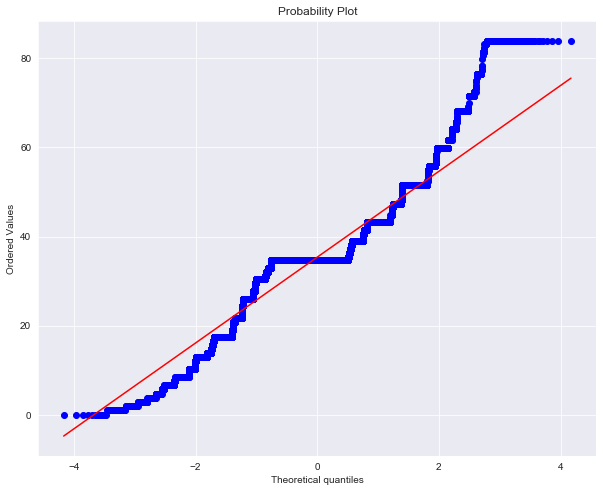

In [76]:
# Ploting the Q-Q plot to see the normality of the transformed column
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
stats.probplot(pr_1 , dist='norm' , plot=plt)
plt.show()

**From the above plot, we can say that box-cox transformation is not helpful to this column**

In [77]:
# Mean Imputation in column hours-per-week

q1 = df['hours-per-week'].quantile(0.25)
q3 = df['hours-per-week'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df['hours-per-week'])
for i in df['hours-per-week']:
    if i > Upper_tail or i < Lower_tail:
            df['hours-per-week'] = df['hours-per-week'].replace(i, m)

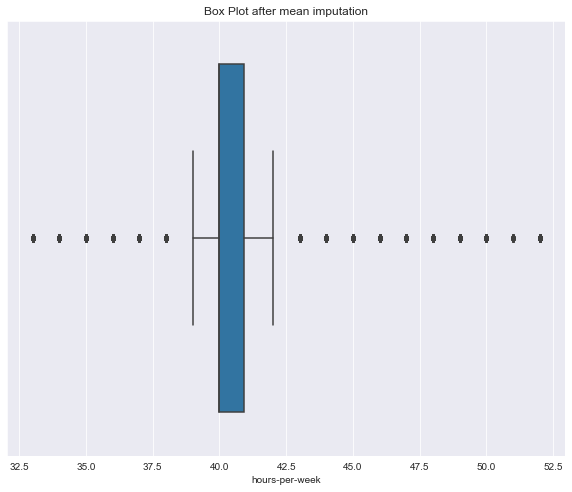

In [78]:
# Let's see the boxplot
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.boxplot(df['hours-per-week'])
plt.title("Box Plot after mean imputation")
plt.show()

## Feature Transformation

In [79]:
df.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

### Column Standardization for Numerical Features

In [80]:
# Numerical Columns
numerical_data = df.select_dtypes(['int64','float64'])
numerical_cols = numerical_data.columns
print('Numerical Columns : {}'.format(list(numerical_cols)))

Numerical Columns : ['age', 'educational-num', 'hours-per-week']


In [81]:
# Column standardization using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [82]:
numerical = df.select_dtypes(include=['int64', 'float64'])   
df_numerical = pd.DataFrame(scaler.fit_transform(numerical),columns = numerical.columns)
df_numerical.head()

,age,educational-num,hours-per-week
0,0.109589,0.400000,0.368421
1,0.287671,0.533333,0.894737
2,0.150685,0.733333,0.368421
3,0.369863,0.600000,0.368421
4,0.232877,0.333333,0.417790


### Column Standardization for Categorical Features

In [83]:
# One Hot Encoding the categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

In [84]:
categorical = df.select_dtypes('object')
df_categorical = pd.DataFrame(encoder.fit_transform(categorical), 
                      columns=encoder.get_feature_names(categorical.columns))
df_categorical.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,gender_Male,native-country_United-States,income_low
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [85]:
#Final dataset 
final_df = pd.concat([df_numerical,df_categorical], axis = 1)
final_df.head()

,age,educational-num,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,gender_Male,native-country_United-States,income_low
0,0.109589,0.400000,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.287671,0.533333,0.894737,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.150685,0.733333,0.368421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.369863,0.600000,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.232877,0.333333,0.417790,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


### Splitting the columns

In [86]:
x = final_df.iloc[:,:-1] 
y = final_df.iloc[:,-1] #target variable

In [87]:
x

,age,educational-num,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,...,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,gender_Male,native-country_United-States
0,0.109589,0.400000,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.287671,0.533333,0.894737,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0.150685,0.733333,0.368421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,0.369863,0.600000,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.232877,0.333333,0.417790,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.136986,0.733333,0.263158,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
45218,0.315068,0.533333,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
45219,0.561644,0.533333,0.368421,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
45220,0.068493,0.533333,0.417790,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


In [88]:
y

0        1.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
45217    1.0
45218    0.0
45219    1.0
45220    1.0
45221    0.0
Name: income_low, Length: 45222, dtype: float64

### Splitting the dataset into Train and Test data

In [89]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.3)

## Applying the Machine Learning Models

### Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

Logistic_model = LogisticRegression()

Logistic_model.fit(x_train, y_train)

y_pred_logistic = Logistic_model.predict(x_test)

from sklearn import metrics

Logistic_Acc= round(metrics.accuracy_score(y_test, y_pred_logistic),2)*100

Logistic_Acc

82.0

### DecisionTreeClassifier

In [91]:
from sklearn.tree import DecisionTreeClassifier

DTC_model = DecisionTreeClassifier(criterion='entropy',random_state=0)

DTC_model.fit(x_train,y_train)

y_pred_DTC = DTC_model.predict(x_test)

DTC_Acc = round(metrics.accuracy_score(y_test, y_pred_DTC),2)*100

DTC_Acc

77.0

### K Nearest Neighbour Classifier

In [92]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=3)

knn_model.fit(x_train,y_train)

y_pred_knn=knn_model.predict(x_test)

Knn_Acc = round(knn_model.score(x_test,y_test),2)*100

Knn_Acc

81.0

### Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()

RF_model.fit(x_train, y_train)

y_pred_RF = RF_model.predict(x_test)

RF_Acc = round(RF_model.score(x_test,y_test),2)*100

RF_Acc

80.0

### Extra Tree Classifier

In [94]:
from sklearn.ensemble import ExtraTreesClassifier

ETC_model = ExtraTreesClassifier(n_estimators=100, random_state=0)

ETC_model.fit(x_train, y_train)

y_pred_ETC = ETC_model.predict(x_test)

ETC_Acc = round(ETC_model.score(x_test,y_test),2)*100

ETC_Acc

79.0

### Gradient Boosting Classifier

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

GBC_model = GradientBoostingClassifier(random_state = 0)

GBC_model.fit(x_train, y_train)

GBC_Acc = round(GBC_model.score(x_test,y_test),2)*100

GBC_Acc

83.0

## Performance of each Model

In [100]:
models = {
    'Logistic Regression':Logistic_Acc,
    'DecisionTreeClassifier':DTC_Acc,
    'KNeighborsClassifier':Knn_Acc,
    'RandomForestClassifier':RF_Acc,
    'ExtraTreesClassifier':ETC_Acc,
    'GradientBoostingClassifier':GBC_Acc,
}

models_score = pd.DataFrame.from_dict(data = models, orient='index',columns=['Score'])

models_score.sort_values(by='Score', ascending=False)

,Score
GradientBoostingClassifier,83.0
Logistic Regression,82.0
KNeighborsClassifier,81.0
RandomForestClassifier,80.0
ExtraTreesClassifier,79.0
DecisionTreeClassifier,77.0
